# Note: I have used MNIST data set here which has high dimension (768) so it may take a lot of time to train multiple models.

In [0]:
from sklearn.random_projection import johnson_lindenstrauss_min_dim
from sklearn.random_projection import SparseRandomProjection
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import datasets
import warnings
warnings.filterwarnings('ignore') 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [0]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [0]:
sc = StandardScaler() 
XtrainSc=sc.fit_transform(X_train)
XtestSc=sc.transform(X_test)

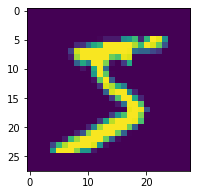

In [5]:
plt.figure(1, figsize=(3, 3))
plt.imshow(X[0].reshape(28,28), interpolation='nearest')
plt.show()

In [6]:
print ("Professors Johnson and Lindenstrauss say: k >=", johnson_lindenstrauss_min_dim(len(X),eps=0.1))

Professors Johnson and Lindenstrauss say: k >= 9562


# For ease of computation one can create smaller steps of dimensions for examples:
# dims = np.int32(np.linspace(2, 768, 10))
# instead of dims = np.int32(np.linspace(2, 768, 20))

In [0]:
model = LinearSVC(max_iter=100)
model.fit(XtrainSc, y_train)
baseline = metrics.accuracy_score(y_test, model.predict(XtestSc))
accuracies = []
dims = np.int32(np.linspace(2, 768, 20))

In [0]:
for dim in dims:
    # Create random projection
    sp = SparseRandomProjection(n_components = dim)
    X = sp.fit_transform(XtrainSc)
 
    # Train classifier of your choice on the sparse random projection
    model = LinearSVC(max_iter=100)
    model.fit(X, y_train)
 
    # Evaluate model and update accuracies
    test = sp.transform(XtestSc)
    accuracies.append(metrics.accuracy_score(y_test,model.predict(test)))

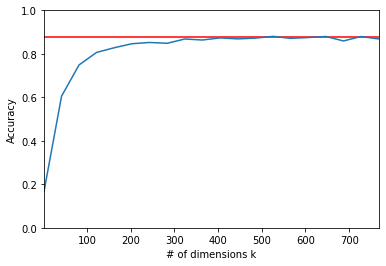

In [9]:
plt.figure()
plt.xlabel("# of dimensions k")
plt.ylabel("Accuracy")
plt.xlim([2, 768])
plt.ylim([0, 1])
 
# Plot baseline and random projection accuracies
plt.plot(dims, [baseline] * len(accuracies), color = "r")
plt.plot(dims, accuracies)

plt.show()

We can see here dimension around 400 can give use reasonable results. Hence we can reduce upto 400 for dimension from 768 and still get similar accuaracy.